In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\peter\AppData\Local\Temp\ipykernel_11944\82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(autoload_with = engine)

In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

# recent_date = session.query(func.max(measurement.date)).first()[0]
# recent_date

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
target_date = dt.date(2017,8,23) - dt.timedelta(days=365)
f'Beginning Date: {target_date}'

'Beginning Date: 2016-08-23'

In [79]:
# Perform a query to retrieve the data and precipitation scores
dates_prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= target_date).\
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(dates_prcp).rename(columns = {'date':'Dates', 'prcp':'Precipitation'})
precip_df.set_index('Dates', inplace=True)
precip_df
# Sort the dataframe by date
precip_df.sort_index(inplace=True)
precip_df.head()

,Precipitation
Dates,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN


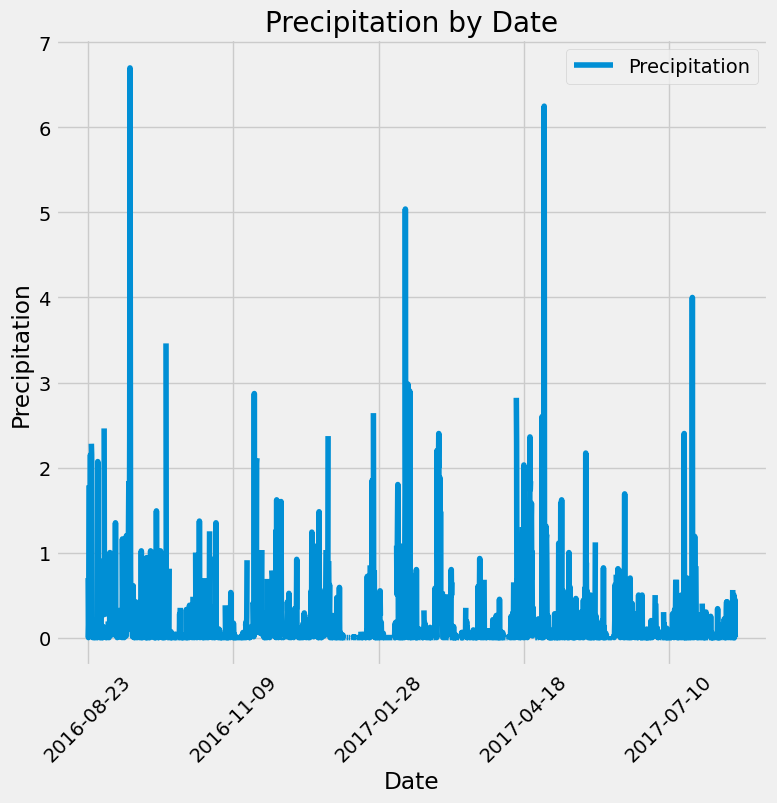

In [80]:
# Use Pandas Plotting with Matplotlib to plot the data
fig,ax=plt.subplots()
precip_df.plot(ax=ax, rot=45, figsize=(8,8))
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.tight_layout()
plt.title("Precipitation by Date")
plt.savefig("Resources/preciptation_by_date.png")
plt.show()

In [14]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count = session.query(measurement.station,func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [60]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs).filter(measurement.station == 'USC00519281')).all()

[(53.0, 87.0, 71.66378066378067)]

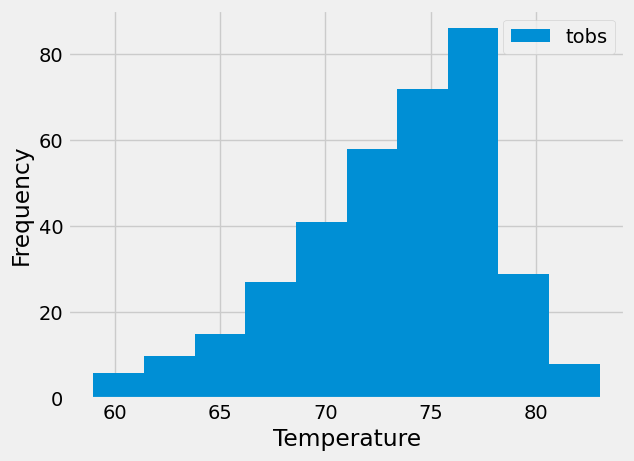

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_mo = session.query(measurement.tobs).filter(measurement.station == 'USC00519281', measurement.date >= target_date).all()
df = pd.DataFrame(twelve_mo)
df.plot.hist()
plt.xlabel('Temperature')
plt.show()

# Close Session

In [19]:
# Close Session
session.close()